# Project 04: Movielens Dataset Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load data
movies = pd.read_csv("movies.dat", sep='::' , header=None, names =['MovieID','Title','Genres'])
ratings = pd.read_csv("ratings.dat" , sep='::' , header=None, names =['UserID','MovieID','Rating','Timestamp'])
users = pd.read_csv("users.dat", sep='::' , header=None, names =['UserID','Gender','Age','Occupation','Zip-code'] )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='pyt

In [3]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
#Merge
#FRirst merge Movies and ratings based on movie id
#Then the result will get merged with Users based on userid
tempDF = pd.merge(movies,ratings, on='MovieID')
finalDF = pd.merge(tempDF,users, on='UserID')
finalDF.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [7]:
finalDF['Rating'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

(array([ 222.,    0.,    0., 1103., 2096.,    0., 1193.,    0., 1046.,
         380.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <a list of 10 Patch objects>)

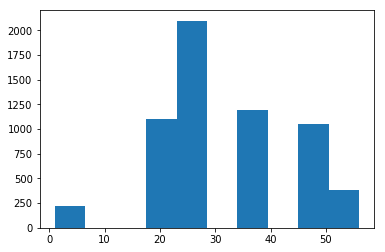

In [8]:
#•	Visualize user age distribution

plt.hist(users['Age'])

Rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: UserID, dtype: int64


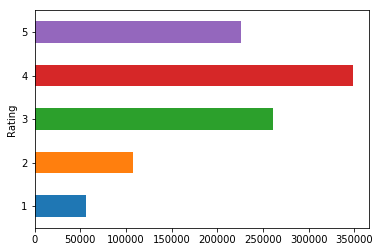

In [9]:
#•	Visualize overall rating by users
print(finalDF.groupby('Rating')['UserID'].count())
finalDF.groupby('Rating')['UserID'].count().plot(kind='barh')


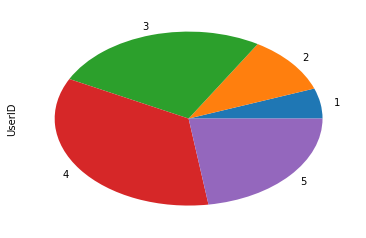

In [10]:
finalDF.groupby('Rating')['UserID'].count().plot(kind='pie')

In [11]:
movieTitles = finalDF.Title.unique()
toyMovie = []
for i in movieTitles:
    if i.startswith("Toy") == True:
        toyMovie.append(i)

toyMovie

['Toy Story (1995)', 'Toy Story 2 (1999)', 'Toys (1992)']

Rating
1     16
2     61
3    345
4    835
5    820
Name: UserID, dtype: int64


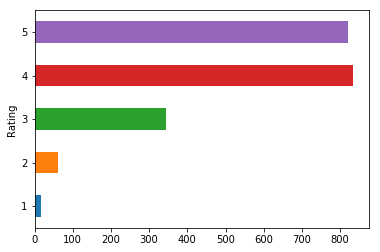

In [12]:
# •	Find and visualize the user rating of the movie “Toy Story”
filterDF = finalDF[(finalDF.Title == 'Toy Story (1995)')]
print(filterDF.groupby('Rating').UserID.count())
filterDF.groupby('Rating').UserID.count().plot(kind='barh')


Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
Name: UserID, dtype: int64


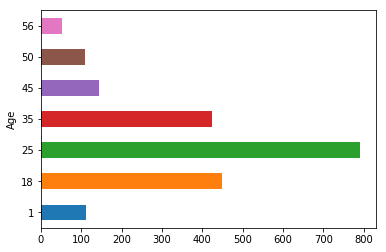

In [13]:
#•	Find and visualize the viewership of the movie “Toy Story” by age group
filterDF = finalDF[(finalDF.Title == 'Toy Story (1995)')]
print(filterDF.groupby('Age').UserID.count())
filterDF.groupby('Age').UserID.count().plot(kind='barh')

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
1580    2538
1198    2514
608     2513
2762    2459
110     2443
2396    2369
1197    2318
527     2304
1617    2288
1265    2278
1097    2269
2628    2250
2997    2241
318     2227
858     2223
Name: Rating, dtype: int64


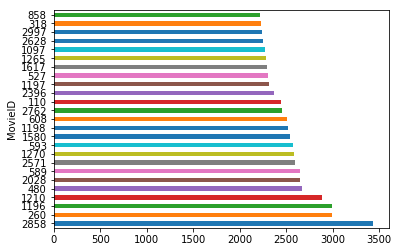

In [14]:
#•	Find and visualize the top 25 movies by viewership rating
print(finalDF.groupby('MovieID').Rating.count().nlargest(25))
finalDF.groupby('MovieID').Rating.count().nlargest(25).plot(kind='barh')

Rating
1     2
2     3
3     3
4    11
5     1
Name: Rating, dtype: int64


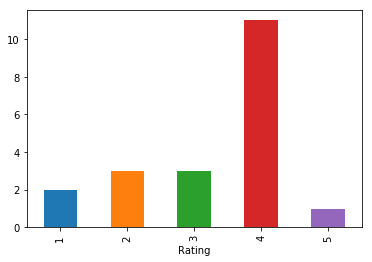

In [15]:
#•	Find the rating for a particular user of user id = 2696
print(finalDF[finalDF.UserID == 2696].groupby('Rating')['Rating'].count())
finalDF[finalDF.UserID == 2696].groupby('Rating')['Rating'].count().plot(kind='bar')

In [16]:
finalDF.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [92]:
features = finalDF.iloc[0:500,[0,7,8]].values
label = finalDF.iloc[0:500,4].values

In [93]:
#Labels: ----> Ordinal (Correct !!!)
label =label.reshape(-1,1)

In [94]:
features

array([[   1,    1,   10],
       [  48,    1,   10],
       [ 150,    1,   10],
       ...,
       [1200,   35,    1],
       [1201,   35,    1],
       [1203,   35,    1]], dtype=int64)

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_text,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=15)

In [101]:
from sklearn.neighbors import KNeighborsClassifier
object1 = KNeighborsClassifier(n_neighbors=15)
object1.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [102]:
object1.score(X_train,y_train)

0.4275

In [103]:
object1.score(X_text,y_test)

0.43

In [104]:
#Acceptable model since the test score is greater than train score. 
#Thus concludes the fact that the generated model is Generalized model

(array([111540.,  88165.,  93040., 152426.,  89853., 106948., 107465.,
         96917.,  85914.,  67941.]),
 array([1.0000e+00, 3.9610e+02, 7.9120e+02, 1.1863e+03, 1.5814e+03,
        1.9765e+03, 2.3716e+03, 2.7667e+03, 3.1618e+03, 3.5569e+03,
        3.9520e+03]),
 <a list of 10 Patch objects>)

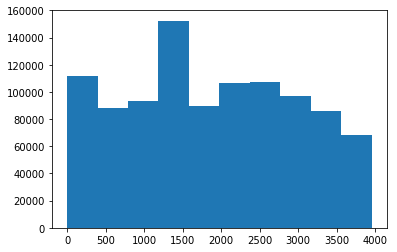

In [105]:
#Histogram for movie age and occupations
plt.hist(finalDF.MovieID)

(array([ 27211.,      0.,      0., 183536., 395556.,      0., 199003.,
             0., 156123.,  38780.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <a list of 10 Patch objects>)

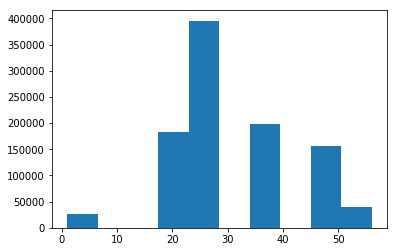

In [106]:
#Histogram for movie age and occupations
plt.hist(finalDF.Age)

(array([215850.,  81691., 152882., 142630.,  14051.,  43853.,  70968.,
         72060., 118837.,  87387.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

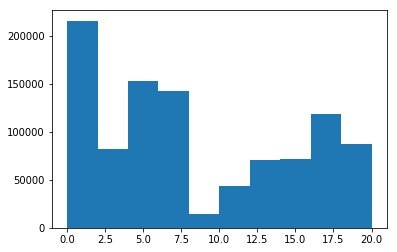

In [107]:
plt.hist(finalDF.Occupation)

In [ ]:
#Fin !!!